<a id="2"></a>
<h1 style="background-color:darksalmon;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Welcome to our Graduation Project</h1>

<a id="1.2"></a>
<h3 style="background-color:lightsteelblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">CHD Prediction Dataset Overview</h3>

The **Framingham Heart Study** is considering a turning point in identifying the **risk factors of heart disease**, and is one of the most important epidemiological studies conducted.

A lot of our present understanding of cardiovascular disease can be attributed to this study.

To better understand heart disease and the measures that could be taken to combat it, the Framingham Heart Study (FHS) was established in the late 1940's.

It was a **joint project of Boston University and the National Heart, Lung, and Blood Institute (NHLBI)**.

The **aim** of the study was to to **better understand cardiovascular disease by enrolling people free of the disease, and see who** 

**developed the disease in the next 10 years.**

|         Column       |                             Description                            |
|:-------------------:|:---------------------------------------------------------------:|
|         Gender        |                Male or female (Nominal)                            |
|         Age         |                Age of the patient (Continuous)                      |
|   Current Smoker    |     Whether or not the patient is a current smoker (Nominal)      |
|    Cigs Per Day     |     The number of cigarettes that the person smoked on average in one day (Continuous) |
|      BP Meds        |     Whether or not the patient was on blood pressure medication (Nominal) |
|  Prevalent Stroke   |     Whether or not the patient had previously had a stroke (Nominal) |
|   Prevalent Hyp     |     Whether or not the patient was hypertensive (Nominal)          |
|      Diabetes       |     Whether or not the patient had diabetes (Nominal)               |
|      Tot Chol       |     Total cholesterol level (Continuous)                            |
|       Sys BP        |     Systolic blood pressure (Continuous)                            |
|       Dia BP        |     Diastolic blood pressure (Continuous)                           |
|         BMI         |     Body Mass Index (Continuous)                                    |
|     Heart Rate      |     Heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of the large number of possible values) |
|       Glucose       |     Glucose level (Continuous)                                      |
|10-year risk of coronary heart disease CHD| Binary variable indicating whether the patient has a 10-year risk of coronary heart disease (CHD) (Binary: "1" means "Yes", "0" means "No") |

<a id="2.1"></a>
<h3 style="background-color:lightsteelblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries & loading the data</h3>

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [118]:
target = 'target'
df = pd.read_csv('Data/data_v1.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
0,Male,39,Higher Degree,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,High School Diploma/GED,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,High School,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,College,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,College,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<a id="2"></a>
<h1 style="background-color:lightsteelblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1>

In [4]:
print(f"There are {df.shape[0]} Rows and {df.shape[1]} Columns")

There are 4238 Rows and 16 Columns


In [5]:
print(f"Number of duplicates {df.duplicated().sum()}")

Number of duplicates 0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  target           4238 non-null   int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 529.9+ KB


In [7]:
df.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
target               0
dtype: int64

In [8]:
df[df[target] == 1].isnull().sum()

gender              0
age                 0
education          16
currentSmoker       0
cigsPerDay          2
BPMeds             11
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             9
sysBP               0
diaBP               0
BMI                10
heartRate           1
glucose            50
target              0
dtype: int64

In [9]:
round(df[df[target] == 0].isnull().sum() / len(df[df[target] == 0]), 2 )

gender             0.00
age                0.00
education          0.02
currentSmoker      0.00
cigsPerDay         0.01
BPMeds             0.01
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            0.01
sysBP              0.00
diaBP              0.00
BMI                0.00
heartRate          0.00
glucose            0.09
target             0.00
dtype: float64

In [10]:
round(df.describe(include='all'),2)

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
count,4238,4238.00,4133,4238.00,4209.00,4185.00,4238.00,4238.00,4238.00,4188.00,4238.00,4238.00,4219.00,4237.00,3850.00,4238.00
unique,2,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,NaN,High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2419,NaN,1720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,49.58,NaN,0.49,9.00,0.03,0.01,0.31,0.03,236.72,132.35,82.89,25.80,75.88,81.97,0.15
std,NaN,8.57,NaN,0.50,11.92,0.17,0.08,0.46,0.16,44.59,22.04,11.91,4.08,12.03,23.96,0.36
min,NaN,32.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.54,44.00,40.00,0.00
25%,NaN,42.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.07,68.00,71.00,0.00
50%,NaN,49.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.40,75.00,78.00,0.00
75%,NaN,56.00,NaN,1.00,20.00,0.00,0.00,1.00,0.00,263.00,144.00,89.88,28.04,83.00,87.00,0.00


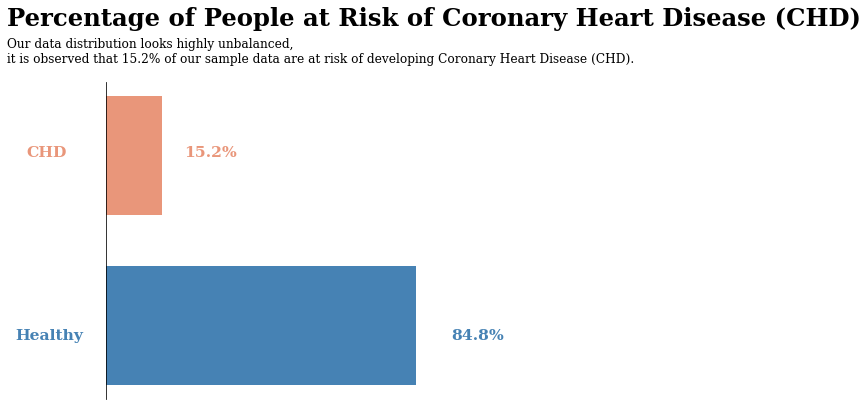

In [11]:
# let us overview the distribution of the target of our data
x = pd.DataFrame(df.groupby(['target'])['target'].count())

# Plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=70)
ax.barh([1], x.target[1], height=0.7, color='darksalmon')
plt.text(-1050, -0.08, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': 'steelblue'})
plt.text(4000, -0.08, '84.8%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': 'steelblue'})
ax.barh([0], x.target[0], height=0.7, color='steelblue')
plt.text(-930, 1, 'CHD', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': 'darksalmon'})
plt.text(900, 1, '15.2%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': 'darksalmon'})

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.text(-1150, 1.77, 'Percentage of People at Risk of Coronary Heart Disease (CHD)', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'})
plt.text(-1150, 1.55, 'Our data distribution looks highly unbalanced,\nit is observed that 15.2% of our sample data are at risk of developing Coronary Heart Disease (CHD).',
         {'font': 'Serif', 'size': '12.5', 'color': 'black'})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

From distribution it is clear that **only every 15 people out of 100 people have develpoed CHD from our sampling data**. So this this appears as a highly **unbalanced data distribution**, and null accuracy score of this distribution it self is 85%, whcih imploys any dump model should randomly predictions of CHD could reach accuracy of 85%. So, while modeling and training data, **over sampling and under sampling** have to be done to obtain good and reliable results.

<a id="2"></a>
<h1 style="background-color:lightsteelblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Dealing with Null Values</h1>

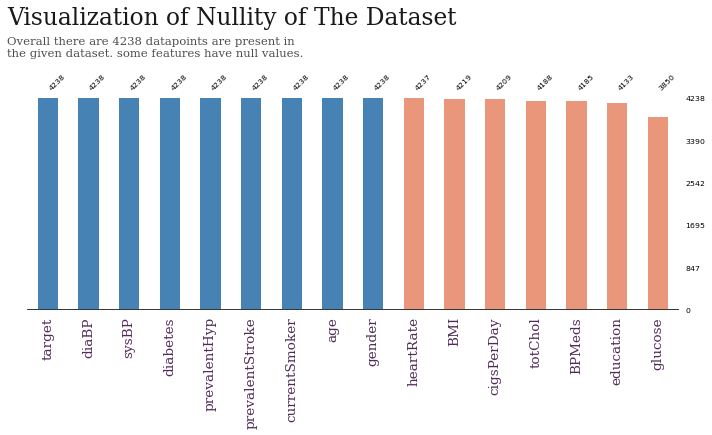

In [12]:
import missingno as msno

color = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','darksalmon','darksalmon','darksalmon', 'darksalmon', 'darksalmon', 'darksalmon', 'darksalmon']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off', filter = 'top')

ax.text(-1,1.35,'Visualization of Nullity of The Dataset',{'font': 'serif', 'size': 24,  'color':'black'},alpha = 0.9)
ax.text(-1,1.2,'Overall there are 4238 datapoints are present in \nthe given dataset. some features have null values.',{'font': 'serif', 'size': 12,  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'serif', 'size': 14,'weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

plt.show()

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Education :</h1>

In [120]:
df['education'].mode()[0]

'High School'

In [121]:
df.loc[df.education.isnull(),'education'] = df['education'].mode()[0]

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">CigsPerDay : </h1>

In [122]:
df['cigsPerDay'].median()

0.0

In [123]:
df.loc[df.cigsPerDay.isnull(), 'cigsPerDay'] = df['cigsPerDay'].median()

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">BPMeds : </h1>

In [124]:
df['BPMeds'].mode()[0]

0.0

In [125]:
df.loc[df.BPMeds.isnull() ,'BPMeds'] = df['BPMeds'].mode()[0]

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">TotChol : </h1>

In [126]:
df['totChol'].median()

234.0

In [127]:
df.loc[df.totChol.isnull(), 'totChol'] = df['totChol'].median()

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">BMI : </h1>

In [128]:
df['BMI'].median()

25.4

In [129]:
df.loc[df.BMI.isnull(),'BMI'] = df.BMI.median()

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">HeartRate : </h1>

In [130]:
df['heartRate'].median()

75.0

In [131]:
df.loc[df.heartRate.isnull(),'heartRate'] = df.heartRate.median()

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Glucose : </h1>

In [132]:
df = df.dropna(subset=['glucose'])

 **All null values have been filled** 

In [133]:
df.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
target             0
dtype: int64

<a id="2.1"></a>
<h3 style="background-color:lightsteelblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Univariate analysis of continuous variables</h3>

In [27]:
# function to automate our features distrubtion exploring process  
df['target'] = df['target'].map({1: 'CHD', 0: 'Healthy'})
def plot_distribution(df, feature, plot_title):
    box_plots_colors = {'Healthy': 'lightsteelblue', 'CHD':'darksalmon'}
    
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1,2, figsize=(20,5))

        sns.histplot(x=feature,
                     data=df, 
                     ax=ax[0],
                     linewidth=0.8,
                     color='lightsteelblue',
                     bins=20).set_title(f"Distribution of {plot_title}")
        ax[0].set_xlabel(plot_title)

        sns.boxplot(x=feature,
                    data=df,
                    y="target",
                    linewidth=1.5,
                    palette=box_plots_colors,
                    ax=ax[1]).set_title(f"Distribution of {plot_title} by CHD")
        ax[1].set_xlabel(plot_title)
        ax[1].set_ylabel('10 years CHD Status')

        plt.show()

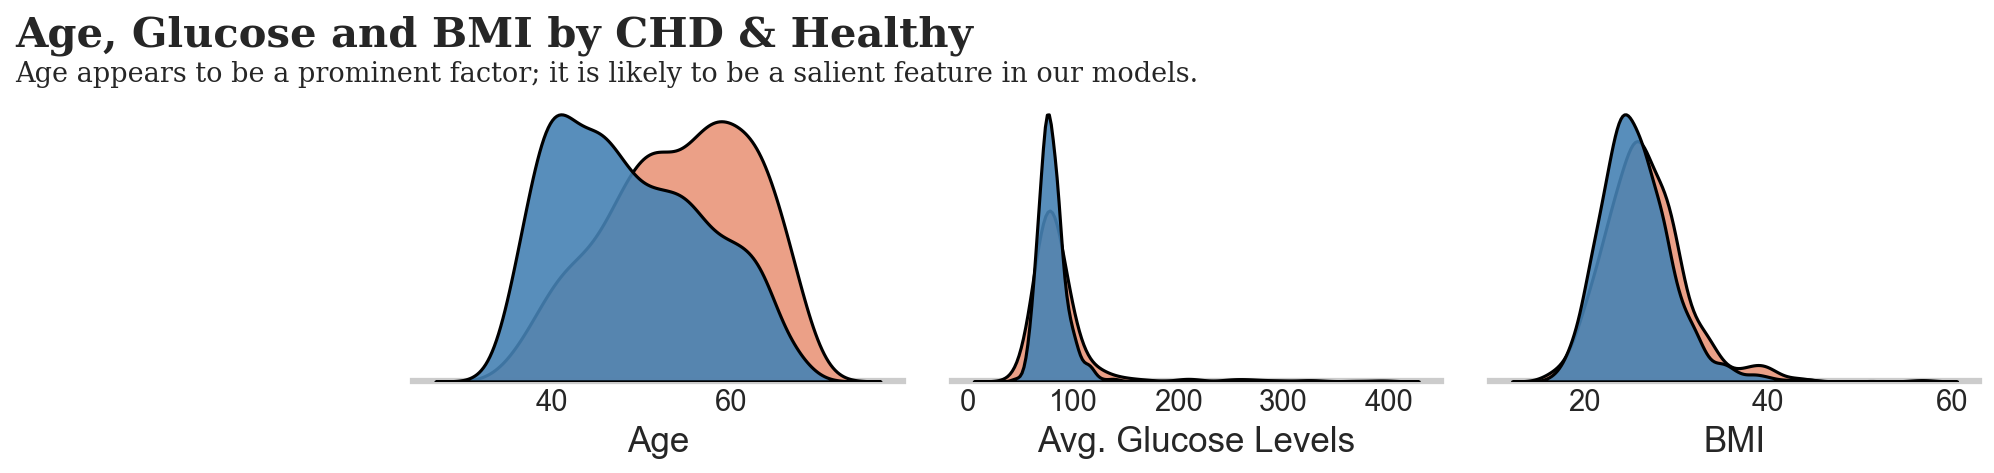

In [136]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='white')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor('white')
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top", "right", "left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['target'] == 1]
ns = df[df['target'] == 0]

for feature in ['age', 'glucose', 'BMI']:
    sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='darksalmon', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
    sns.kdeplot(ns[feature], ax=locals()["ax"+str(plot)], color='steelblue', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
    locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1, 5))
    plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')

ax0.text(-20, 0.056, 'Age, Glucose and BMI by CHD & Healthy', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'Age appears to be a prominent factor; it is likely to be a salient feature in our models.',
         fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

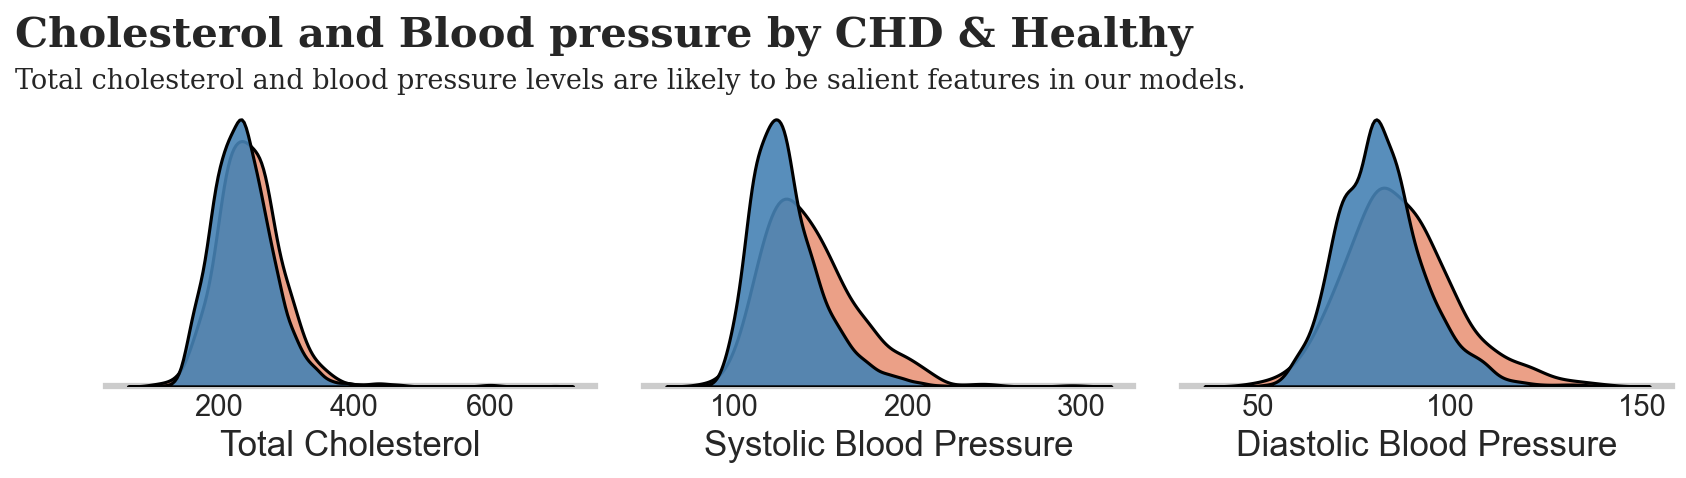

In [137]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='white')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor('white')
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top", "right", "left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
s = df[df['target'] == 1]
ns = df[df['target'] == 0]

for feature in ['totChol', 'sysBP', 'diaBP']:
    sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='darksalmon', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
    sns.kdeplot(ns[feature], ax=locals()["ax"+str(plot)], color='steelblue', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
    locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1, 5))
    plot += 1

ax0.set_xlabel('Total Cholesterol')
ax1.set_xlabel('Systolic Blood Pressure')
ax2.set_xlabel('Diastolic Blood Pressure')

ax0.text(-100, 0.012, 'Cholesterol and Blood pressure by CHD & Healthy', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-100, 0.0105, 'Total cholesterol and blood pressure levels are likely to be salient features in our models.', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

<a id="2.2"></a>
<h3 style="background-color:lightsteelblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Univariate analysis of discrete variables</h3>

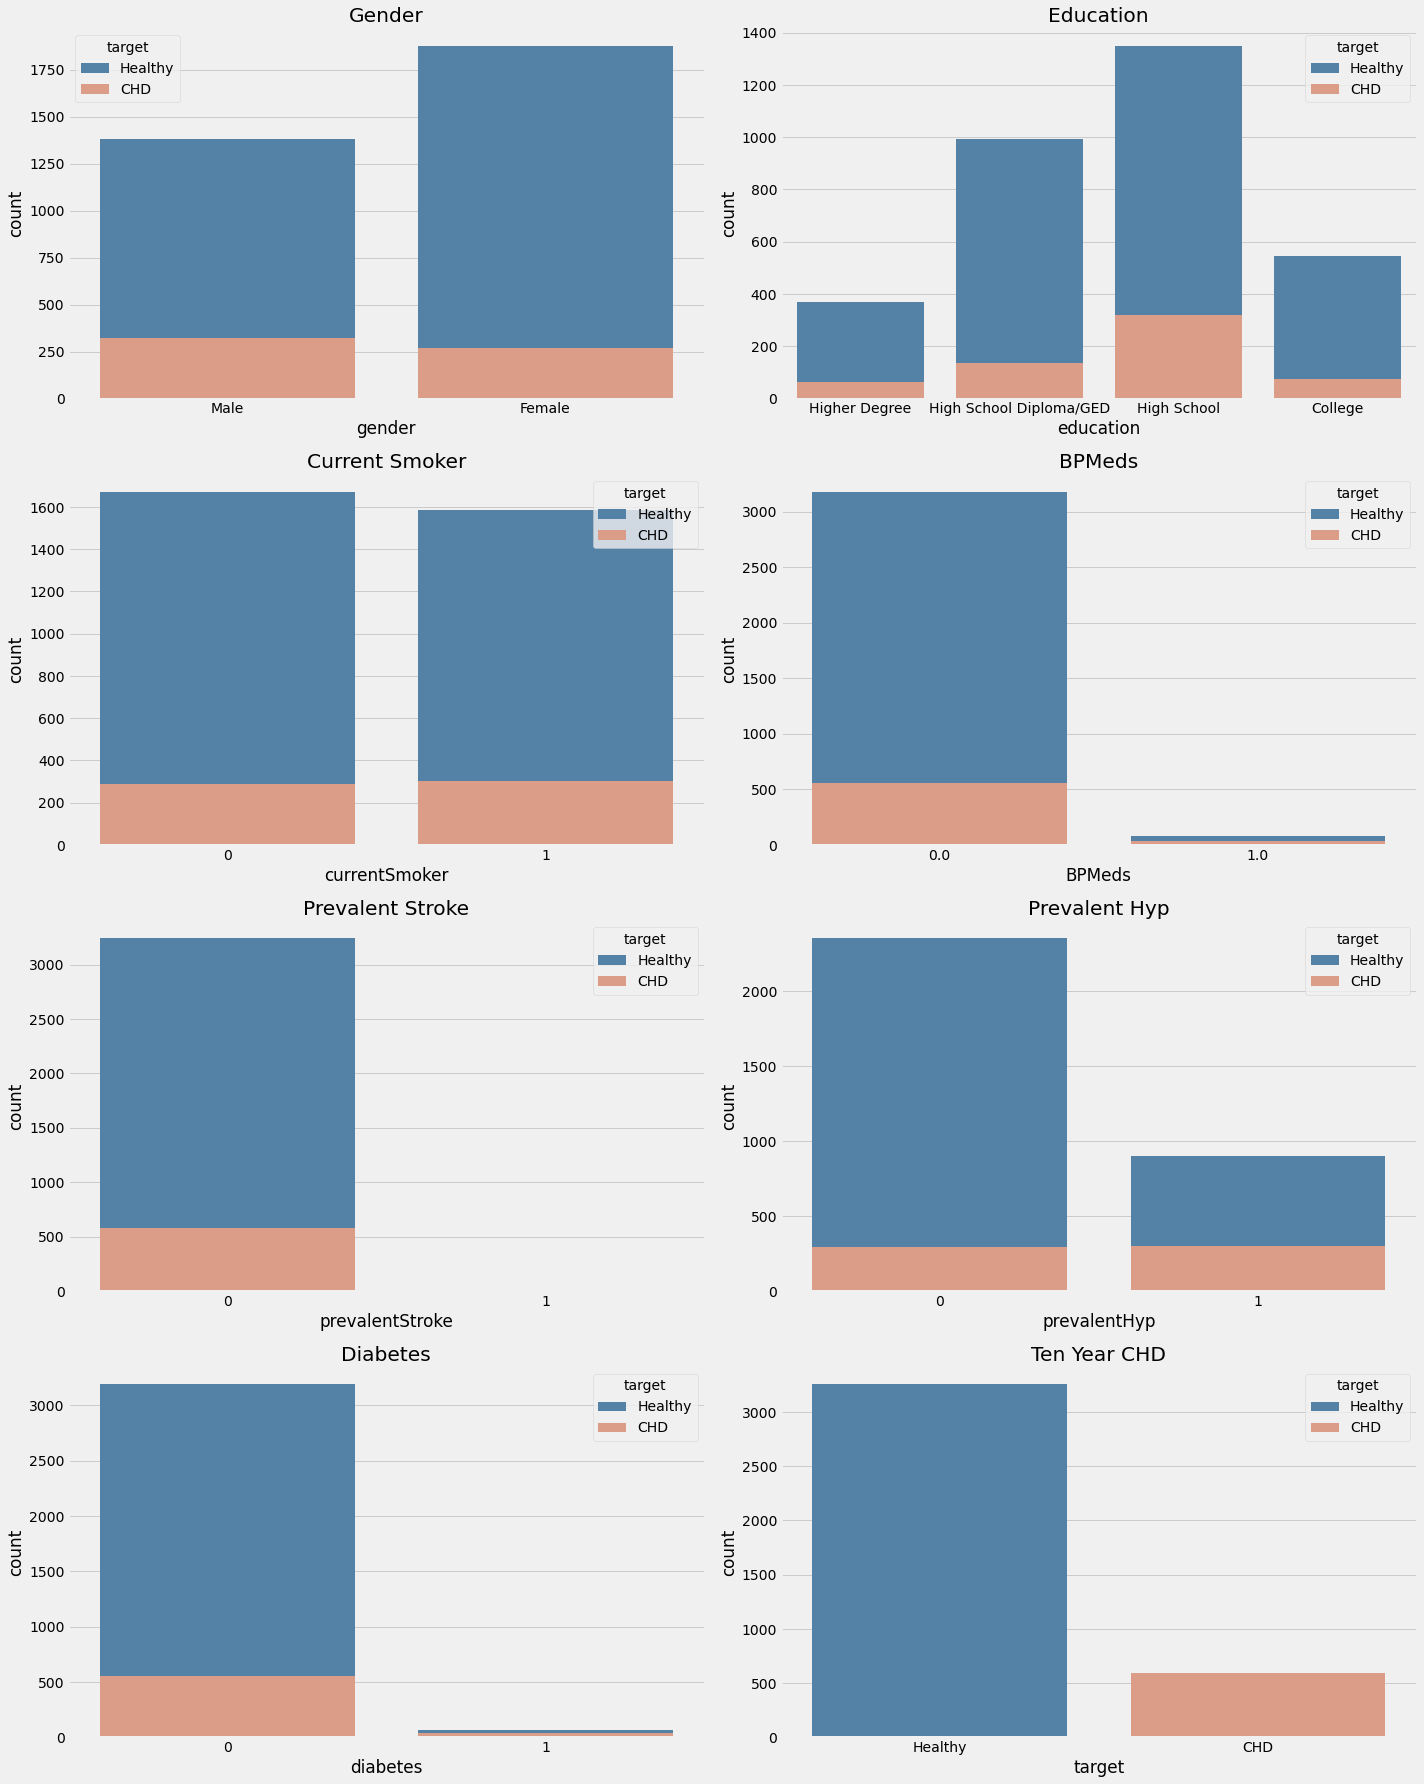

In [30]:
plt.style.use('fivethirtyeight')
custom_palette = {'Healthy': 'steelblue', 'CHD': 'darksalmon'}

fig, axes = plt.subplots(4, 2, figsize=(20, 25))

features = ['gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'target']
titles = ['Gender', 'Education', 'Current Smoker', 'BPMeds', 'Prevalent Stroke', 'Prevalent Hyp', 'Diabetes', 'Ten Year CHD']

for i, (feature, title) in enumerate(zip(features, titles)):
    ax = axes[i // 2, i % 2]
    ax.set_title(title)
    sns.countplot(x=df[feature], hue=df['target'], dodge=False, palette=custom_palette, ax=ax)

plt.tight_layout()
plt.show()

# <a id="2.1"></a>
<h3 style="background-color:lightsteelblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Visualization Functions</h3>

There are many different types of graphs, each with its own unique properties and applications. 

We will use :

   1- **Pie plot** : for **Categorical data**
   
   2- **KDE plot** (kernel density estimation plot) : for **Numerical data**
   
   3- **Box Plot** : for **definition of outliers in numerical data**

In [31]:
def kde_plot(col):
    plt.figure(figsize=(10,6))
    
    # Set the style of the plot
    sns.set_style("whitegrid")
    
    # Set the background color
    plt.rcParams['axes.facecolor'] = '#f0f0f0'
    
    # Generate the KDE plot
    sns.kdeplot(df[col], shade=True, color='firebrick')
    
    plt.show()

In [32]:
def kde_with_target(col):
    plt.figure(figsize=(10,6))

    data1 = df[df['target'] == 1][col]
    data2 = df[df['target'] == 0][col]

    plot1 = sns.kdeplot(data1, shade=True, color='firebrick')
    plot2 = sns.kdeplot(data2, shade=True, color='steelblue')

    plt.suptitle(f"The distribution of {col} for people with CHD & without CHD")

    plt.legend(title='CHD', labels=['With CHD', 'Without CHD'])

    plt.show()

In [33]:
def pie_plot(df, group_feature, overall_title, colors):
    # Calculate percentage of each category in the group feature
    grouped = df[group_feature].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(figsize=(8, 6))

        wedges, texts, autotexts = ax.pie(grouped['percentage'], labels=grouped['index'],
                                           autopct='%1.1f%%', colors=colors)
        ax.set_title(f'Distribution of {overall_title}')  # Set the title to be the group feature
        plt.setp(autotexts, size=16, color="w")

        plt.tight_layout()
        plt.show()

In [34]:
def pie_with_target(df, group_feature, overall_title):
    # Calculate percentage of people who developed CHD for each group
    grouped = df.groupby(group_feature)['target'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

    # Define custom color palette
    custom_palette = {0: 'steelblue', 1: 'darksalmon'}
    # Define custom legend labels
    legend_labels = {0: 'Healthy', 1: 'CHD'}

    unique_groups = grouped[group_feature].unique()
    num_unique_groups = len(unique_groups)

    # Ensure all CHD statuses are in custom_palette and legend_labels
    assert set(grouped['target'].unique()).issubset(custom_palette.keys()), "All CHD statuses must be keys in custom_palette"
    assert set(grouped['target'].unique()).issubset(legend_labels.keys()), "All CHD statuses must be keys in legend_labels"

    if num_unique_groups == 0:
        print("No unique groups found in the group feature.")
        return

    with plt.style.context('fivethirtyeight'):
        fig, axs = plt.subplots(1, num_unique_groups, figsize=(15, 6))

        if num_unique_groups == 1:
            axs = [axs]  # To handle the case where there is only 1 group

        for i, group_status in enumerate(unique_groups):
            data = grouped[grouped[group_feature]== group_status ]
            labels = data['target'].map(legend_labels).tolist() # map CHD status to labels
            colors = data['target'].map(custom_palette).tolist() # map CHD status to colors
            wedges, texts, autotexts = axs[i].pie(data['percentage'], labels=labels, colors=colors, autopct='%1.1f%%')

            axs[i].set_title(f'{group_status}')  # Set the title to be the group feature and status
            plt.setp(autotexts, size=16, color="w")
        
        
        fig.suptitle(f'Percentage of people who developed CHD grouped by {overall_title} status', fontsize=18)
        plt.tight_layout()
        plt.show()

In [35]:
def col_details(col_name):
    
    print(f"Name : {col_name} \nType : {df[col_name].dtype}")
    
    print(f"Number of unique Values : {df[col_name].nunique()}")
    
    print(f"Number of null Values : {df[col_name].isnull().sum()}")
    random_number = np.random.randint(4000)
    print(f"\nSome Random Data \n {df[col_name][random_number:random_number + 5]}")
    print(f"\nTop 5 Values {df[col_name].value_counts().index[:5]}")
    if df[col_name].dtype != "object":
        print(f"Max value : {df[col_name].max()}\nMin Value : {df[col_name].min()}")
    

In [36]:
def IQR_bands(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_band = Q1 - 1.5 * IQR
    upper_band = Q3 + 1.5 * IQR
    return upper_band, lower_band


In [37]:
def box_plot(df, feature, plot_title):
    with plt.style.context('fivethirtyeight'):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[feature], color='steelblue')
        plt.title(f"Boxplot of {plot_title}")
        plt.xlabel(plot_title)
        plt.show()
        

# <a id="2.1"></a>
<h3 style="background-color:lightsteelblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Parameters</h3>

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Gender : </h1>

**Male or Female**

In [38]:
col_details("gender")

Name : gender 
Type : object
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 4193    Female
4194      Male
4195    Female
4196    Female
4197    Female
Name: gender, dtype: object

Top 5 Values Index(['Female', 'Male'], dtype='object')


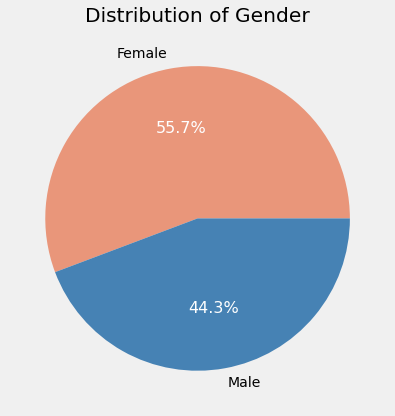

In [39]:
pie_plot(df, 'gender', 'Gender', colors=['darksalmon','steelblue'])

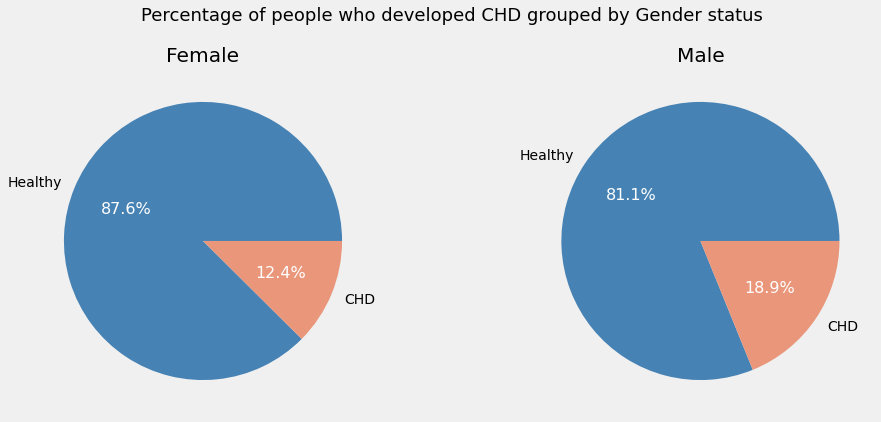

In [42]:
pie_with_target(df, 'gender', 'Gender')

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Age : </h1>

**Age of the patient**

In [43]:
col_details("age")

Name : age 
Type : int64
Number of unique Values : 39
Number of null Values : 0

Some Random Data 
 1249    47
1250    45
1251    58
1252    38
1253    50
Name: age, dtype: int64

Top 5 Values Int64Index([40, 46, 42, 41, 48], dtype='int64')
Max value : 70
Min Value : 32


<ipython-input-44-f172a32ac6d2>:16: RuntimeWarning: invalid value encountered in longlong_scalars
  rate.append(df[df['age'] < i]['target'].sum() / len(df[df['age'] < i]['target']))


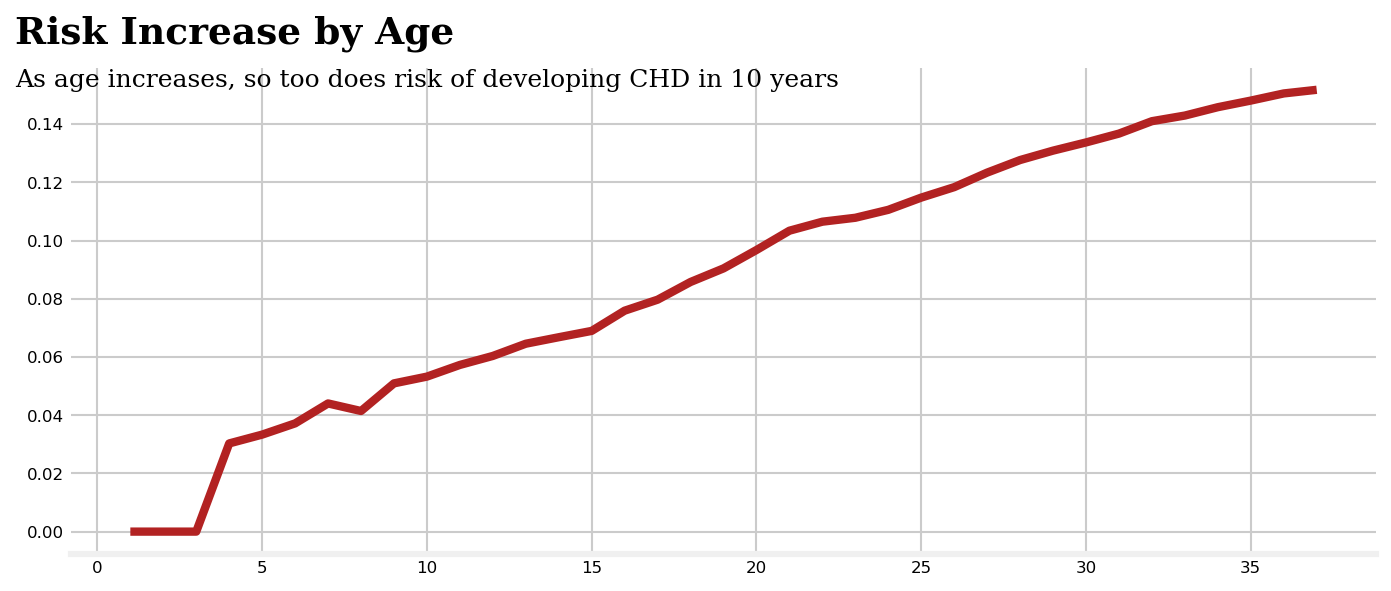

In [44]:
background_color = "white"  
# Create the figure and the grid
fig = plt.figure(figsize=(10, 10), dpi=150, facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

# Ensure 'age' is int
df['age'] = df['age'].astype(int)

# Calculate the CHD rate by age
rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['target'].sum() / len(df[df['age'] < i]['target']))

# Plot the rate
sns.lineplot(data=rate, color='firebrick', ax=ax0)  # Line color changed here

# Remove spines
for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

# Adjust tick parameters
ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both', length=0)

# Add text
ax0.text(-2.5, 0.168, 'Risk Increase by Age', fontsize=18, fontfamily='serif', fontweight='bold')
ax0.text(-2.5, 0.153, 'As age increases, so too does risk of developing CHD in 10 years', fontsize=12, fontfamily='serif')

plt.show()

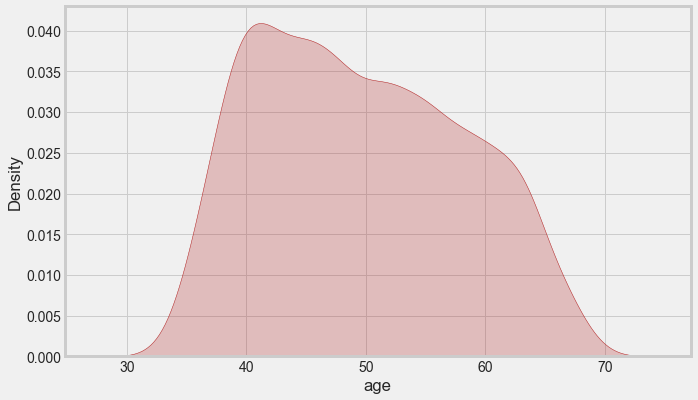

In [45]:
kde_plot("age")

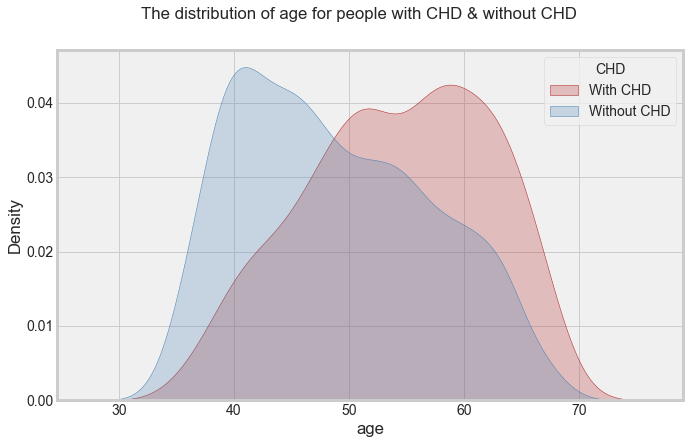

In [46]:
kde_with_target("age")

In [47]:
print("the mean of Age of people with chd is ",df[df[target] == 1]['age'].median())

the mean of Age of people with chd is  55.0


In [48]:
print("the mean of Age of people without chd is ",df[df[target] == 0]['age'].median())

the mean of Age of people without chd is  48.0


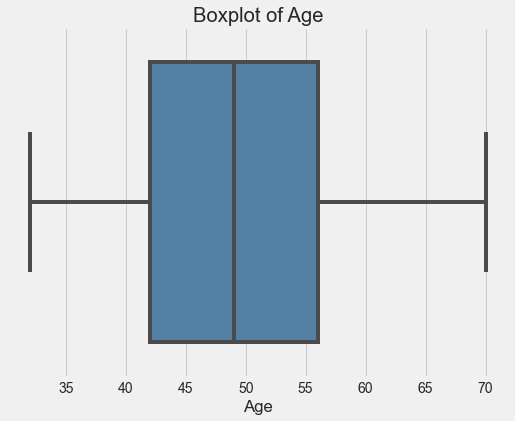

In [49]:
box_plot(df,'age','Age')

In [50]:
IQR_bands("age")

(77.0, 21.0)

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Education : </h1>

**Education level of the patient**

In [51]:
col_details("education")

Name : education 
Type : object
Number of unique Values : 4
Number of null Values : 105

Some Random Data 
 3132    High School Diploma/GED
3133    High School Diploma/GED
3134              Higher Degree
3135                High School
3136                High School
Name: education, dtype: object

Top 5 Values Index(['High School', 'High School Diploma/GED', 'College', 'Higher Degree'], dtype='object')


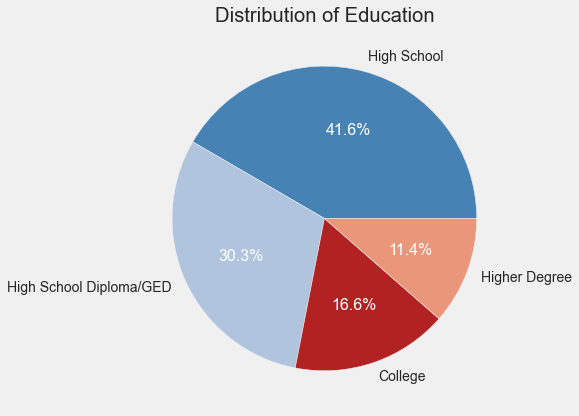

In [52]:
pie_plot(df, 'education', 'Education', colors=['steelblue','lightsteelblue','firebrick','darksalmon'])

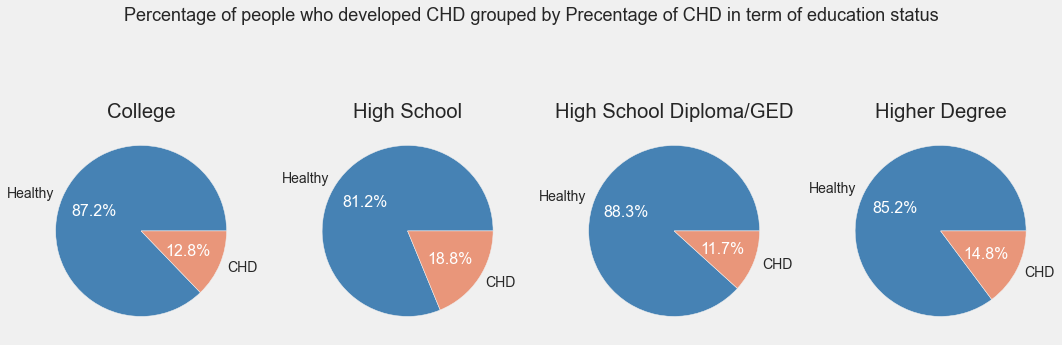

In [53]:
pie_with_target(df,"education","Precentage of CHD in term of education")

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">CurrentSmoker : </h1>

**Whether or not the patient is a current smoker**

In [54]:
col_details('currentSmoker')

Name : currentSmoker 
Type : int64
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 1509    1
1510    0
1511    0
1512    0
1513    0
Name: currentSmoker, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value : 1
Min Value : 0


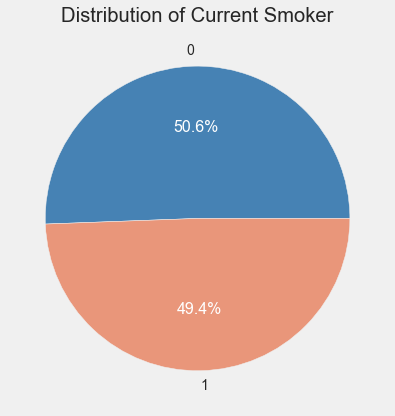

In [55]:
pie_plot(df, 'currentSmoker', 'Current Smoker', colors=['steelblue','darksalmon'])

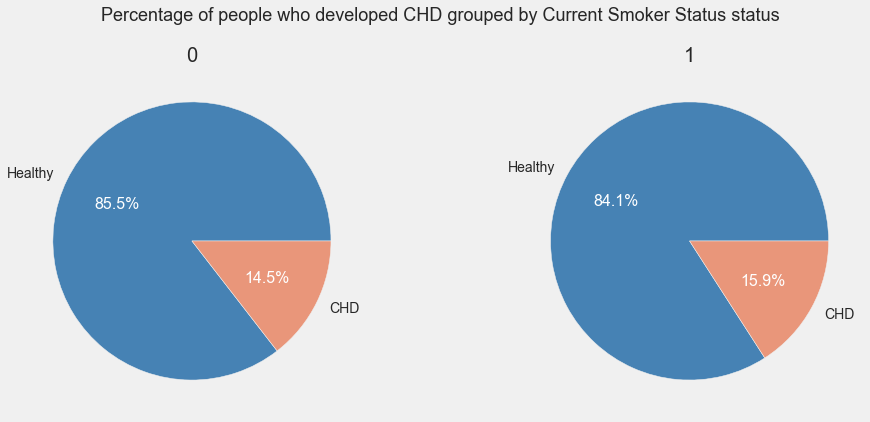

In [56]:
pie_with_target(df, 'currentSmoker', 'Current Smoker Status')

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">CigsPerDay : </h1>

**The number of cigarettes that the person smoked on average in one day**

In [57]:
col_details("cigsPerDay")

Name : cigsPerDay 
Type : float64
Number of unique Values : 33
Number of null Values : 29

Some Random Data 
 1755    1.0
1756    0.0
1757    8.0
1758    0.0
1759    9.0
Name: cigsPerDay, dtype: float64

Top 5 Values Float64Index([0.0, 20.0, 30.0, 15.0, 10.0], dtype='float64')
Max value : 70.0
Min Value : 0.0


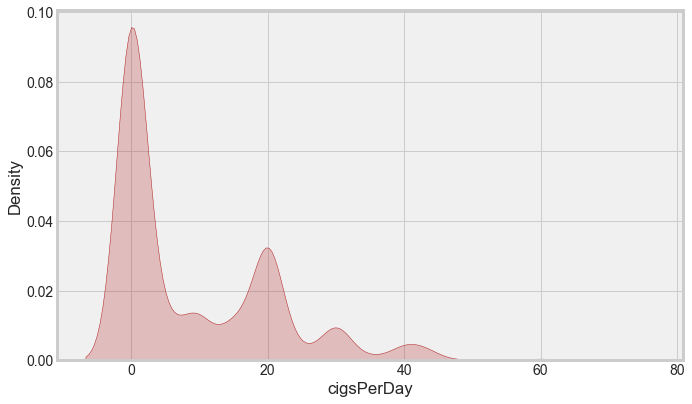

In [58]:
kde_plot("cigsPerDay")

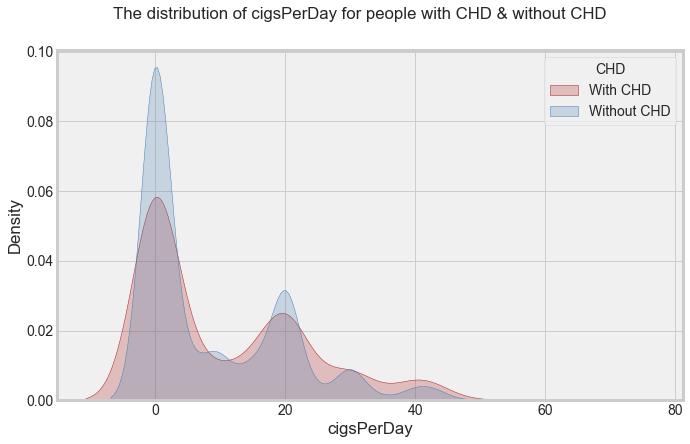

In [59]:
kde_with_target("cigsPerDay")

In [60]:
print("the mean of cigsPerDay of people with chd is ",df[df[target] == 1]['cigsPerDay'].mean())

the mean of cigsPerDay of people with chd is  10.629283489096574


In [61]:
print("the mean of cigsPerDay of people with chd is ",df[df[target] == 0]['cigsPerDay'].mean())

the mean of cigsPerDay of people with chd is  8.71040089711242


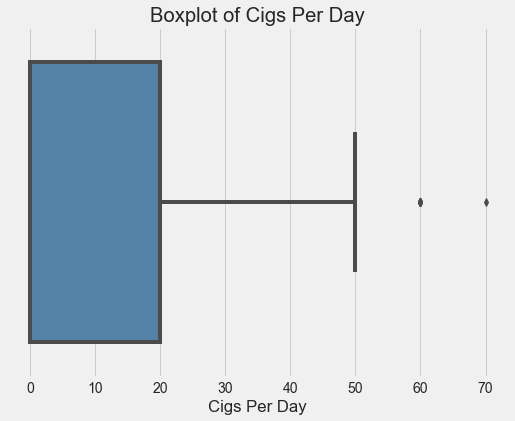

In [62]:
box_plot(df,'cigsPerDay','Cigs Per Day')

In [63]:
IQR_bands("cigsPerDay")

(50.0, -30.0)

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">BPMeds : </h1>

**Whether or not the patient was on blood pressure medication**

In [64]:
col_details("BPMeds")

Name : BPMeds 
Type : float64
Number of unique Values : 2
Number of null Values : 53

Some Random Data 
 355    0.0
356    0.0
357    0.0
358    0.0
359    0.0
Name: BPMeds, dtype: float64

Top 5 Values Float64Index([0.0, 1.0], dtype='float64')
Max value : 1.0
Min Value : 0.0


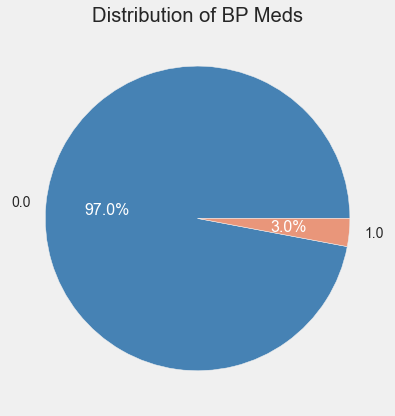

In [65]:
pie_plot(df, 'BPMeds', 'BP Meds', colors=['steelblue','darksalmon'])

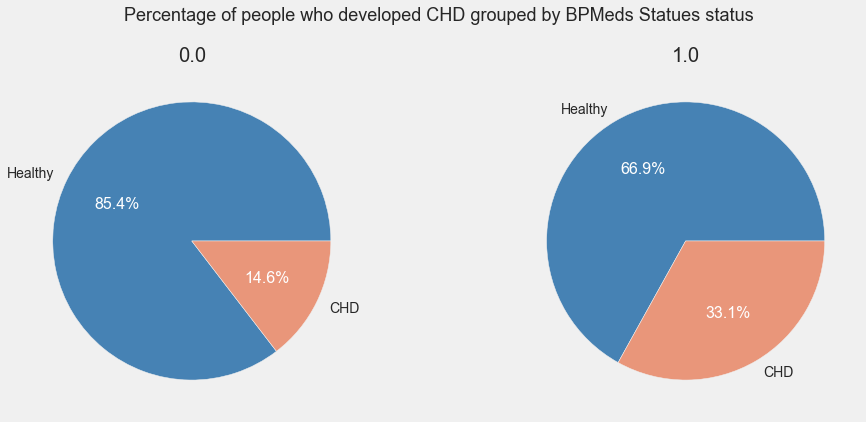

In [66]:
pie_with_target(df, 'BPMeds', 'BPMeds Statues')

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">PrevalentStroke : </h1>

**Whether or not the patient had previously had a stroke**

In [67]:
col_details("prevalentStroke")

Name : prevalentStroke 
Type : int64
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 2398    0
2399    0
2400    0
2401    0
2402    0
Name: prevalentStroke, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value : 1
Min Value : 0


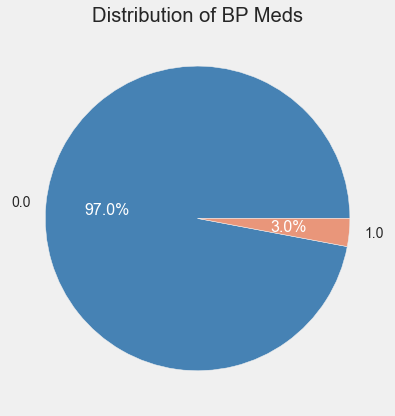

In [68]:
pie_plot(df, 'BPMeds', 'BP Meds', colors=['steelblue','darksalmon'])

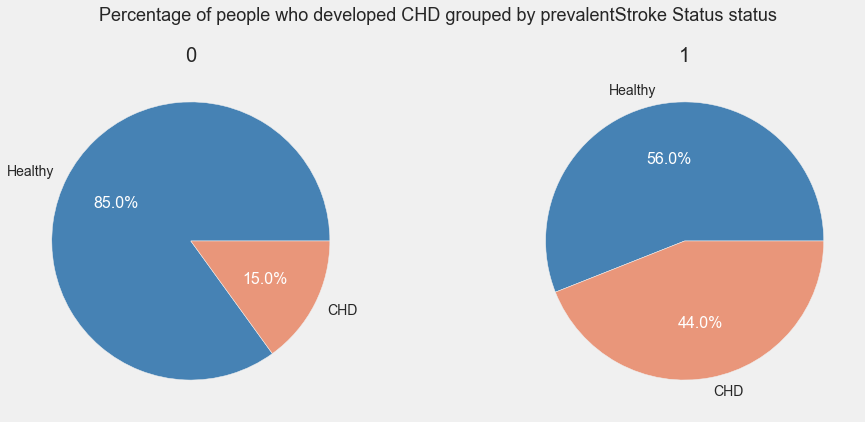

In [69]:
pie_with_target(df, 'prevalentStroke', 'prevalentStroke Status')

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">PrevalentHyp : </h1>

**Whether or not the patient was hypertensive**

In [70]:
col_details('prevalentHyp')

Name : prevalentHyp 
Type : int64
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 1813    0
1814    0
1815    0
1816    1
1817    0
Name: prevalentHyp, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value : 1
Min Value : 0


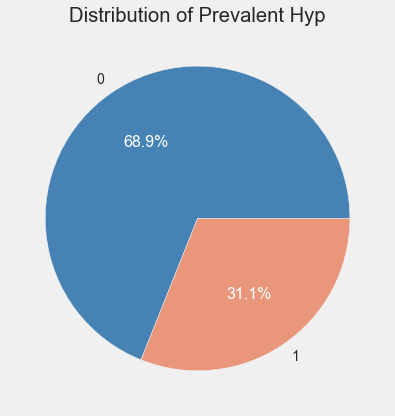

In [71]:
pie_plot(df, 'prevalentHyp', 'Prevalent Hyp', colors=['steelblue','darksalmon'])

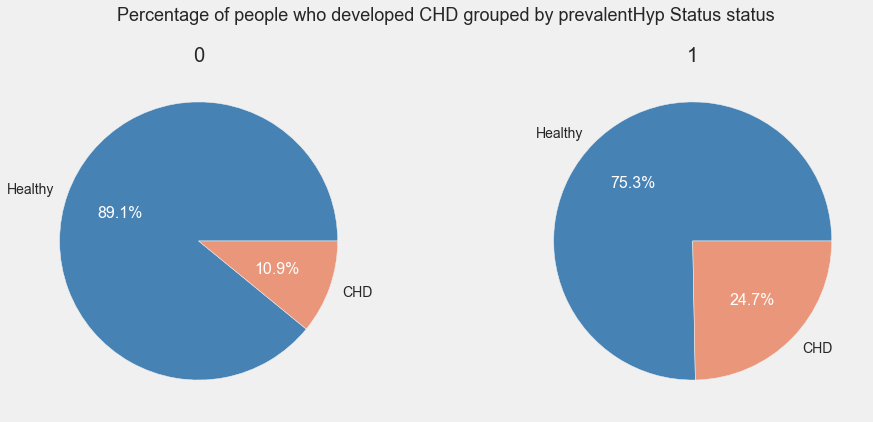

In [72]:
pie_with_target(df, 'prevalentHyp', 'prevalentHyp Status')

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Diabetes : </h1>

**Whether or not the patient had diabetes**

In [73]:
col_details("diabetes")

Name : diabetes 
Type : int64
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 2693    0
2694    0
2695    0
2696    0
2697    0
Name: diabetes, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value : 1
Min Value : 0


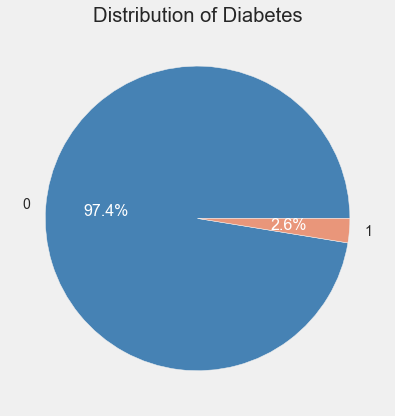

In [74]:
pie_plot(df, 'diabetes', 'Diabetes', colors=['steelblue','darksalmon'])

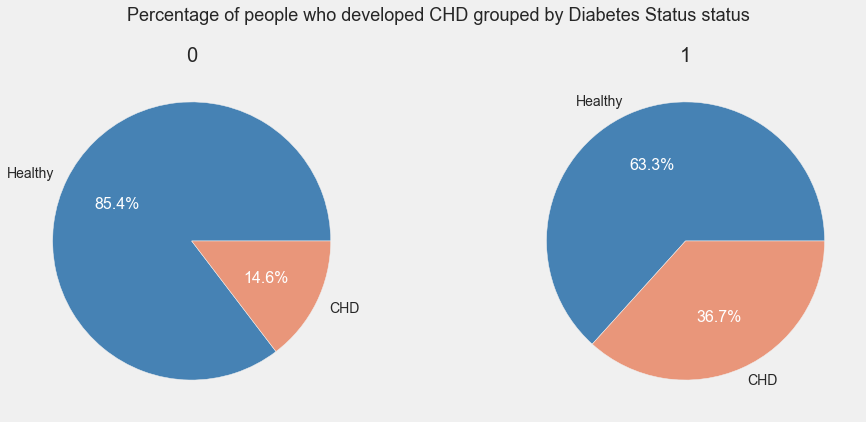

In [75]:
pie_with_target(df, 'diabetes', 'Diabetes Status')

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">TotChol : </h1>

**Total cholesterol level**

In [76]:
col_details('totChol')

Name : totChol 
Type : float64
Number of unique Values : 248
Number of null Values : 50

Some Random Data 
 2610    231.0
2611    288.0
2612      NaN
2613    211.0
2614    240.0
Name: totChol, dtype: float64

Top 5 Values Float64Index([240.0, 220.0, 260.0, 210.0, 232.0], dtype='float64')
Max value : 696.0
Min Value : 107.0


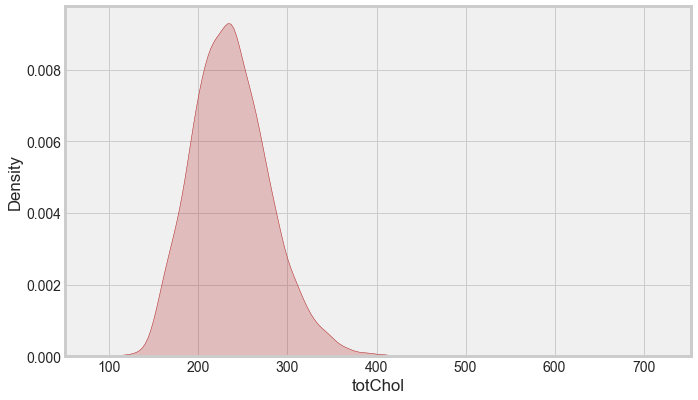

In [77]:
kde_plot("totChol")

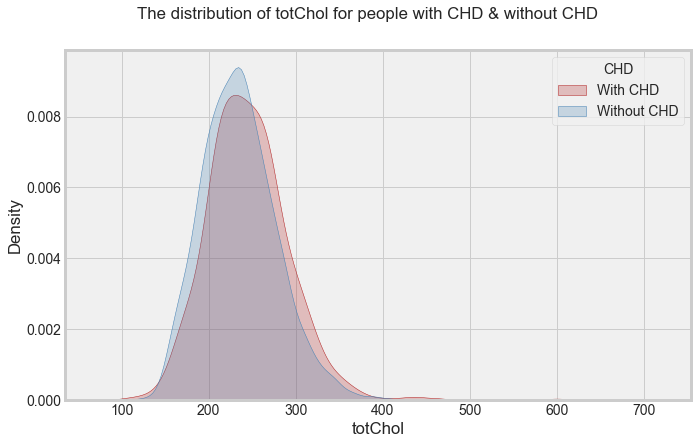

In [78]:
kde_with_target("totChol")

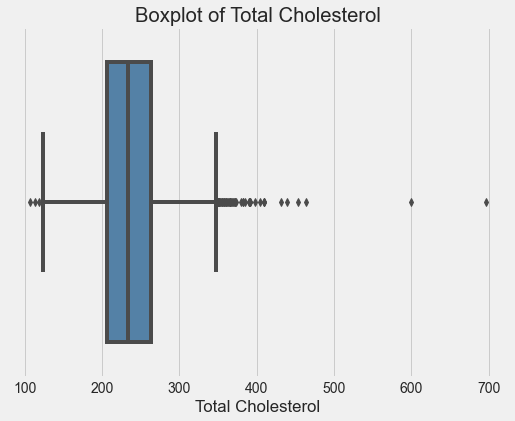

In [79]:
box_plot(df,'totChol','Total Cholesterol')

In [80]:
IQR_bands("totChol")

(348.5, 120.5)

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">SysBP : </h1>

**Systolic blood pressure**

In [81]:
col_details("sysBP")

Name : sysBP 
Type : float64
Number of unique Values : 234
Number of null Values : 0

Some Random Data 
 2347    118.0
2348    144.0
2349    175.0
2350    120.0
2351    146.0
Name: sysBP, dtype: float64

Top 5 Values Float64Index([120.0, 130.0, 110.0, 115.0, 125.0], dtype='float64')
Max value : 295.0
Min Value : 83.5


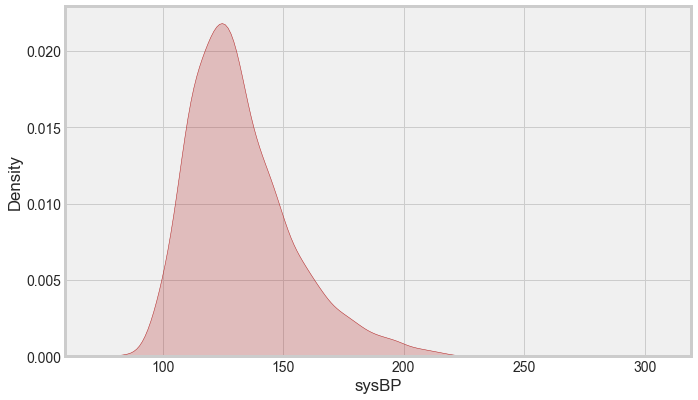

In [82]:
kde_plot("sysBP")

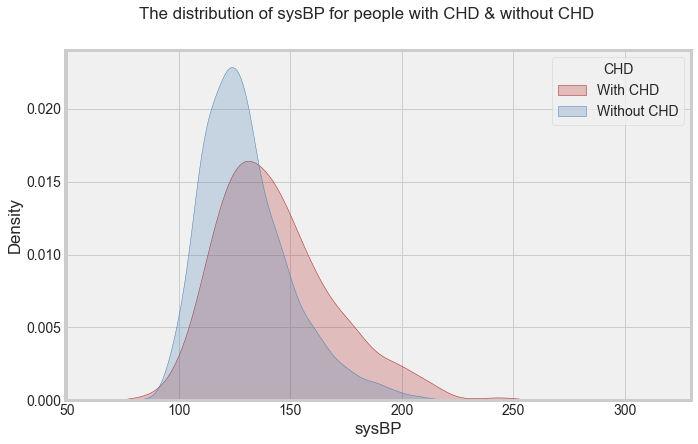

In [83]:
kde_with_target("sysBP")

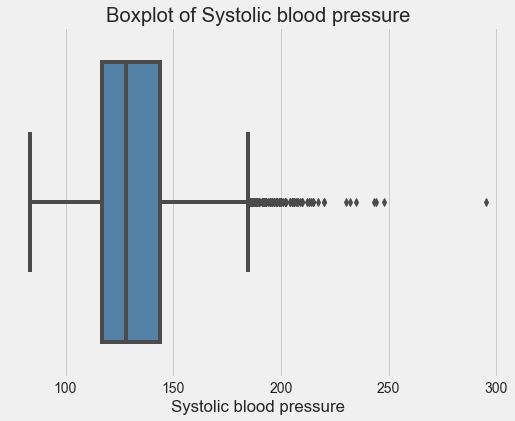

In [84]:
box_plot(df,'sysBP','Systolic blood pressure')

In [85]:
IQR_bands("sysBP")

(184.5, 76.5)

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">DiaBP : </h1>

**Diastolic blood pressure**

In [86]:
col_details("diaBP")

Name : diaBP 
Type : float64
Number of unique Values : 146
Number of null Values : 0

Some Random Data 
 553    103.0
554     82.0
555     75.0
556     76.0
557     85.0
Name: diaBP, dtype: float64

Top 5 Values Float64Index([80.0, 82.0, 85.0, 70.0, 81.0], dtype='float64')
Max value : 142.5
Min Value : 48.0


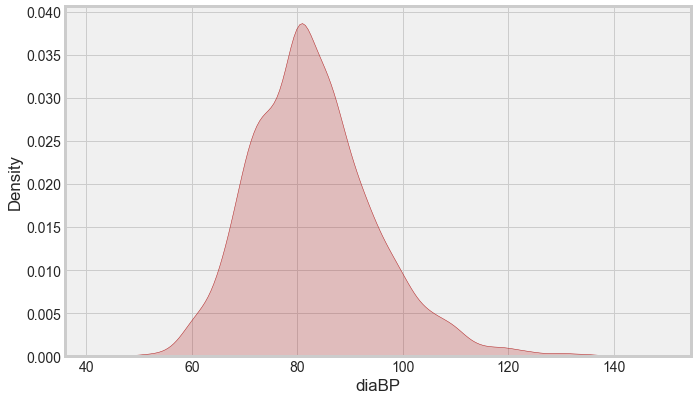

In [87]:
kde_plot("diaBP")

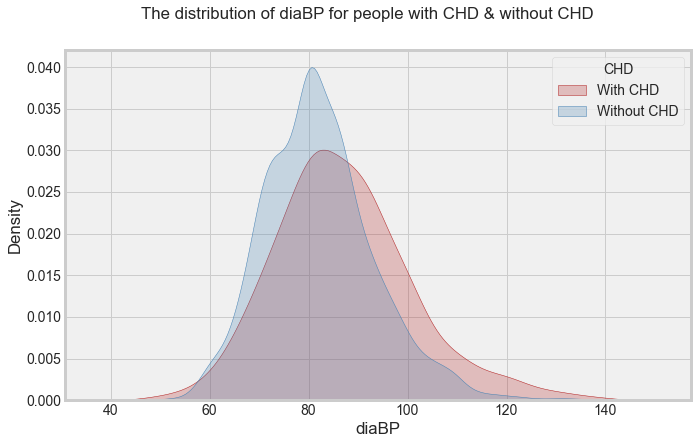

In [88]:
kde_with_target("diaBP")

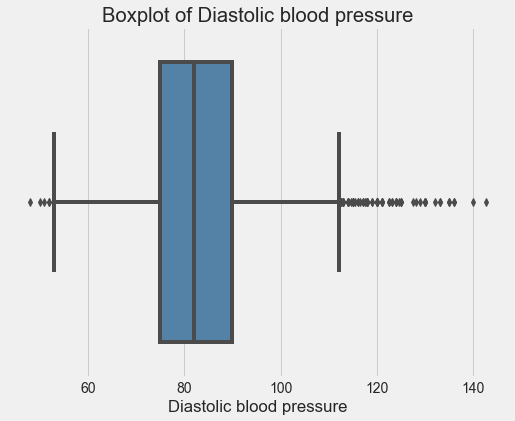

In [89]:
box_plot(df,'diaBP','Diastolic blood pressure')

In [90]:
IQR_bands("diaBP")

(112.1875, 52.6875)

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">BMI : </h1>

 **Body Mass Index**

In [91]:
col_details("BMI")

Name : BMI 
Type : float64
Number of unique Values : 1363
Number of null Values : 19

Some Random Data 
 3116    25.74
3117    27.88
3118    22.34
3119    24.05
3120    27.69
Name: BMI, dtype: float64

Top 5 Values Float64Index([22.19, 22.54, 22.91, 23.48, 25.09], dtype='float64')
Max value : 56.8
Min Value : 15.54


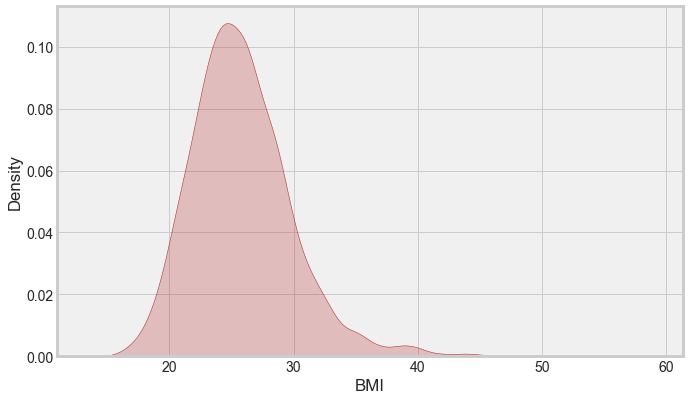

In [92]:
kde_plot("BMI")

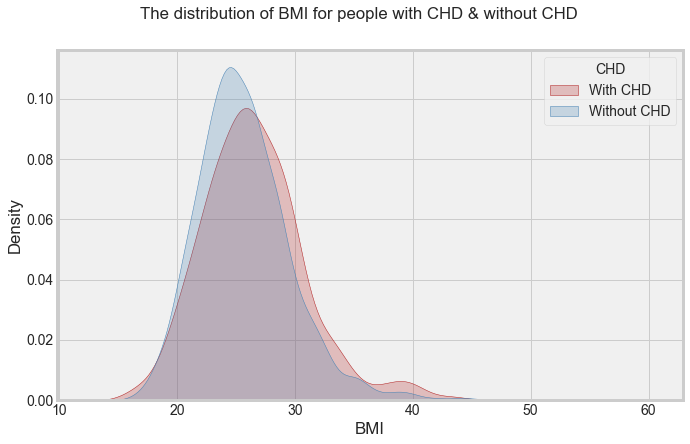

In [93]:
kde_with_target("BMI")

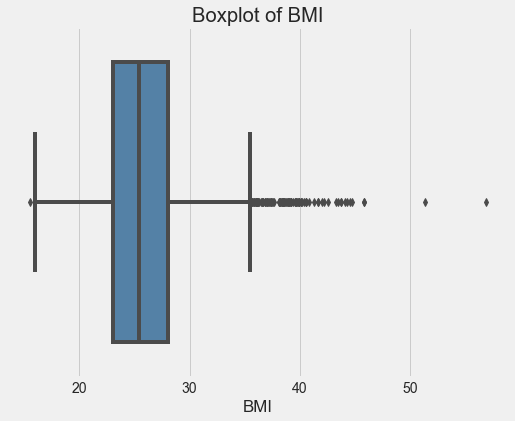

In [94]:
box_plot(df,'BMI','BMI')

In [95]:
IQR_bands("BMI")

(35.495, 15.615000000000002)

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">HeartRate : </h1>

**Patient's Heart Rate**

In [96]:
col_details("heartRate")

Name : heartRate 
Type : float64
Number of unique Values : 73
Number of null Values : 1

Some Random Data 
 3812    65.0
3813    75.0
3814    70.0
3815    82.0
3816    80.0
Name: heartRate, dtype: float64

Top 5 Values Float64Index([75.0, 80.0, 70.0, 60.0, 85.0], dtype='float64')
Max value : 143.0
Min Value : 44.0


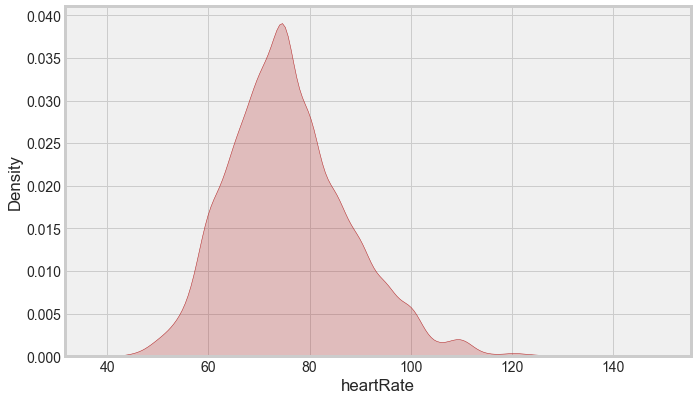

In [97]:
kde_plot("heartRate")

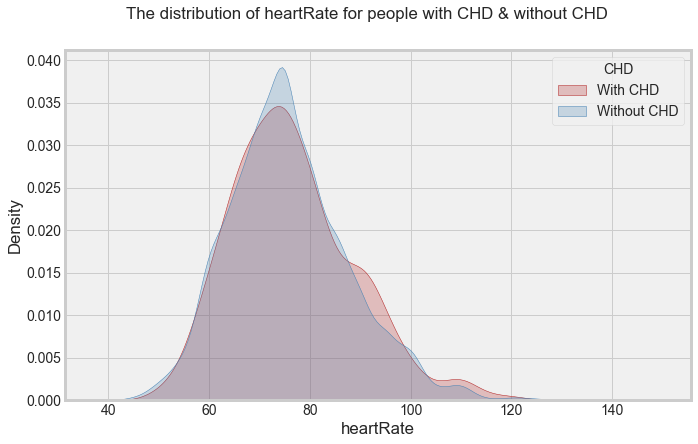

In [98]:
kde_with_target("heartRate")

#### this graph show that people with Chd have higher hearRate than normal people

In [99]:
print("the mean of heartRate of people with chd is ",df[df[target] == 1]['heartRate'].mean())

the mean of heartRate of people with chd is  76.5303265940902


In [100]:
print("the mean of heartRate of people without chd is ",df[df[target] == 0]['heartRate'].mean())

the mean of heartRate of people without chd is  75.7623817473567


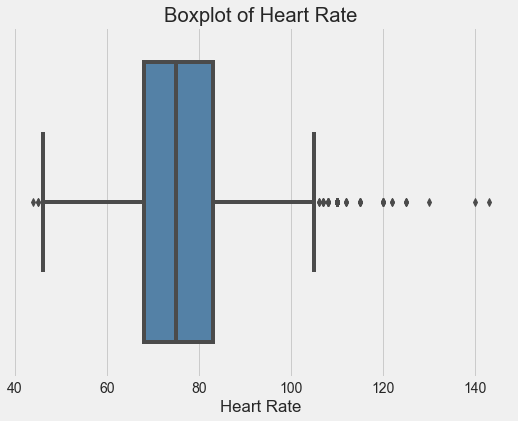

In [101]:
box_plot(df,'heartRate','Heart Rate')

In [102]:
IQR_bands("heartRate")

(105.5, 45.5)

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Glucose : </h1>

**Glucose level**

In [103]:
col_details("glucose")

Name : glucose 
Type : float64
Number of unique Values : 143
Number of null Values : 388

Some Random Data 
 1152     95.0
1153    111.0
1154     88.0
1155     80.0
1156     73.0
Name: glucose, dtype: float64

Top 5 Values Float64Index([75.0, 77.0, 73.0, 70.0, 80.0], dtype='float64')
Max value : 394.0
Min Value : 40.0


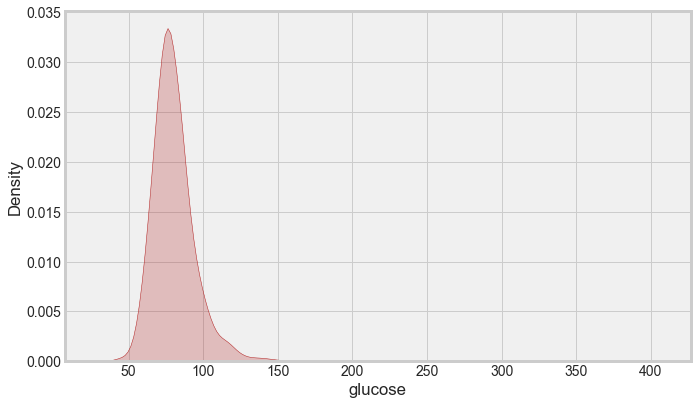

In [104]:
kde_plot("glucose")

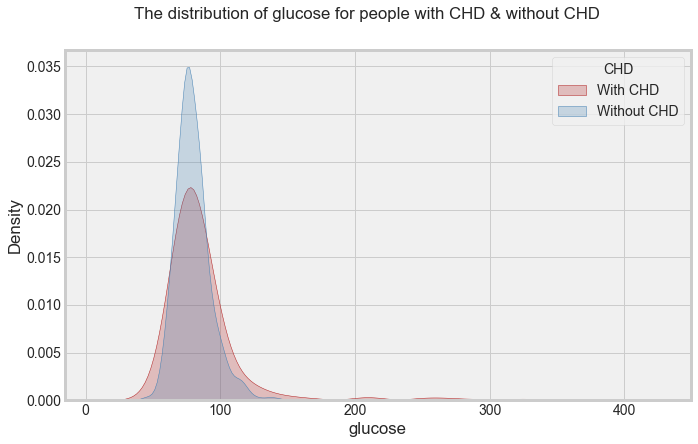

In [105]:
kde_with_target("glucose")

In [106]:
print("the mean of glucose of people with chd is ",df[df[target] == 1]['glucose'].mean())

the mean of glucose of people with chd is  89.00841750841751


In [107]:
print("the mean of glucose of people without chd is ",df[df[target] == 0]['glucose'].mean())

the mean of glucose of people without chd is  80.6821253071253


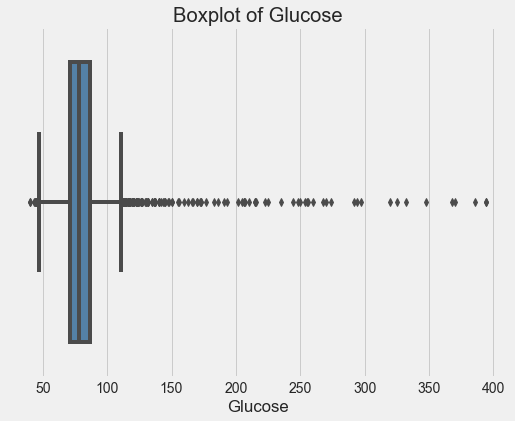

In [108]:
box_plot(df,'glucose','Glucose')

In [109]:
IQR_bands("glucose")

(111.0, 47.0)

# <a id="2"></a>
<h1 style="background-color:moccasin;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Target : </h1>

 **whether the patient has a 10-year risk of coronary heart disease (CHD)**

In [110]:
col_details(target)

Name : target 
Type : int64
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 114    0
115    1
116    1
117    0
118    0
Name: target, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value : 1
Min Value : 0


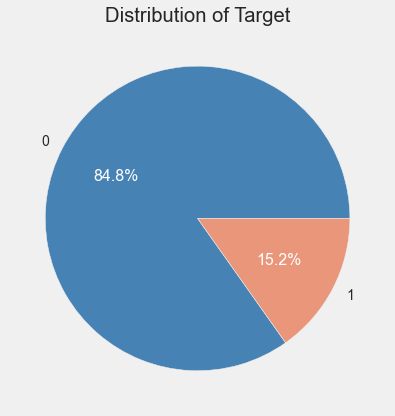

In [111]:
pie_plot(df, 'target', 'Target', colors=['steelblue','darksalmon'])

# <a id="2.1"></a>
<h3 style="background-color:lightsteelblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Correlation</h3>

In [112]:
df.corr()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
age,1.000000,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
currentSmoker,-0.213748,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,-0.192791,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,0.122995,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,0.057655,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.307194,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.101258,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,0.262131,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184
sysBP,0.394302,-0.130230,-0.088780,0.254219,0.057009,0.696755,0.111283,0.208908,1.000000,0.784002,0.326981,0.182246,0.140621,0.216429
diaBP,0.206104,-0.107746,-0.056632,0.194227,0.045190,0.615751,0.050329,0.165182,0.784002,1.000000,0.377588,0.181255,0.061231,0.145299


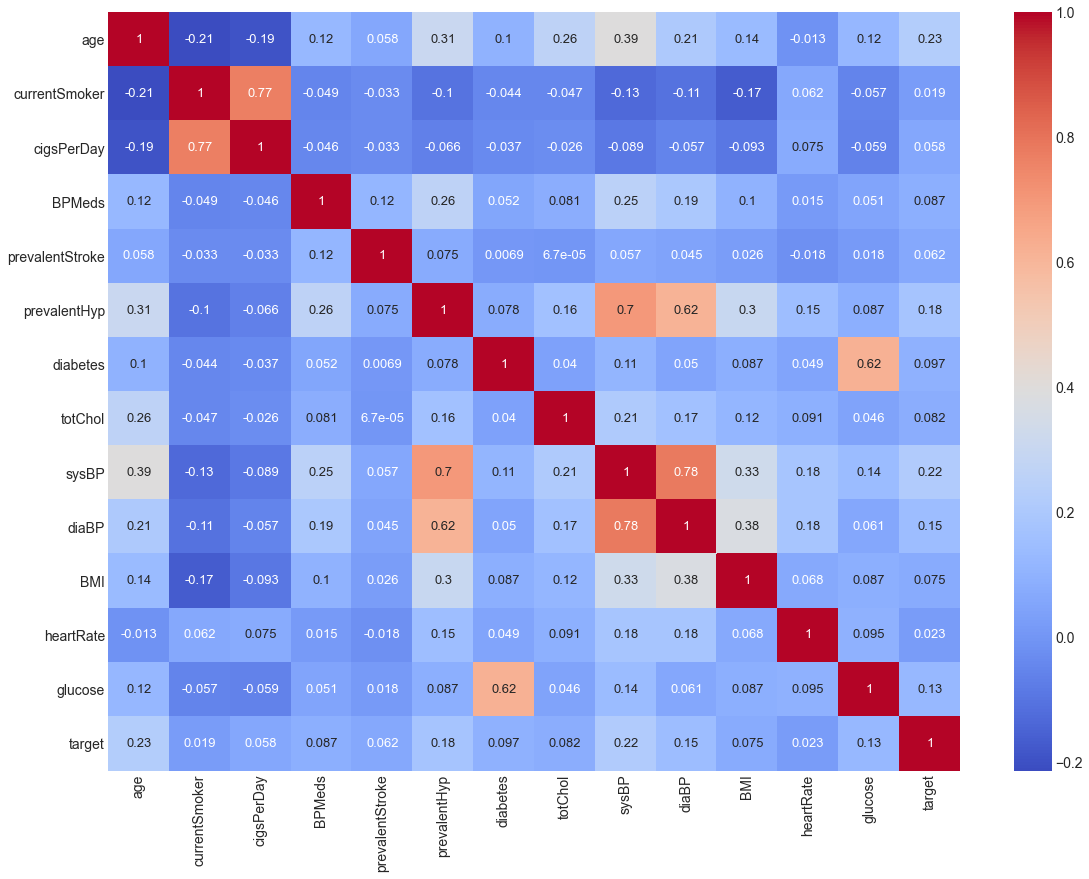

In [113]:
plt.figure(figsize=(17,13))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 13},cmap='coolwarm')
plt.show()


# <a id="2.1"></a>
<h3 style="background-color:lightsteelblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Variance Inflation Factor </h3>

In [114]:
!pip install statsmodels

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
# [item for item in items if item >  }
numerical_columns = [col for col in df.columns if df[col].dtype != "O"]
numerical_columns

['age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'target']

In [134]:
# Create a new dataframe for features 
df_features = df[numerical_columns].drop('target', axis=1)
  
# Initialize the dataframe for VIF
vif_df = pd.DataFrame()
vif_df["feature"] = df_features.columns
  
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(len(df_features.columns))]

# Sort and print the VIF data
vif_df.sort_values("VIF",ascending=False)

,feature,VIF
8,sysBP,135.614794
9,diaBP,129.365563
10,BMI,44.719898
0,age,40.096202
11,heartRate,38.133472
7,totChol,30.700556
12,glucose,19.696446
1,currentSmoker,4.756192
2,cigsPerDay,3.785040
5,prevalentHyp,2.374400


# <a id="2.1"></a>
<h3 style="background-color:lightsteelblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Updating Data</h3>

In [135]:
df.to_csv("Data/Cleaned_data.csv")